**1. Split Dataset, Adjust **

In [ ]:
# Install the medmnist package
!pip install medmnist

# Install PyTorch and related packages (if you don't have them)
!pip install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 3.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive # Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Train images: (1335, 64, 64, 64)
Train labels: (1335, 1)
Showing all 64 slices for sample 0 (Label: 1)


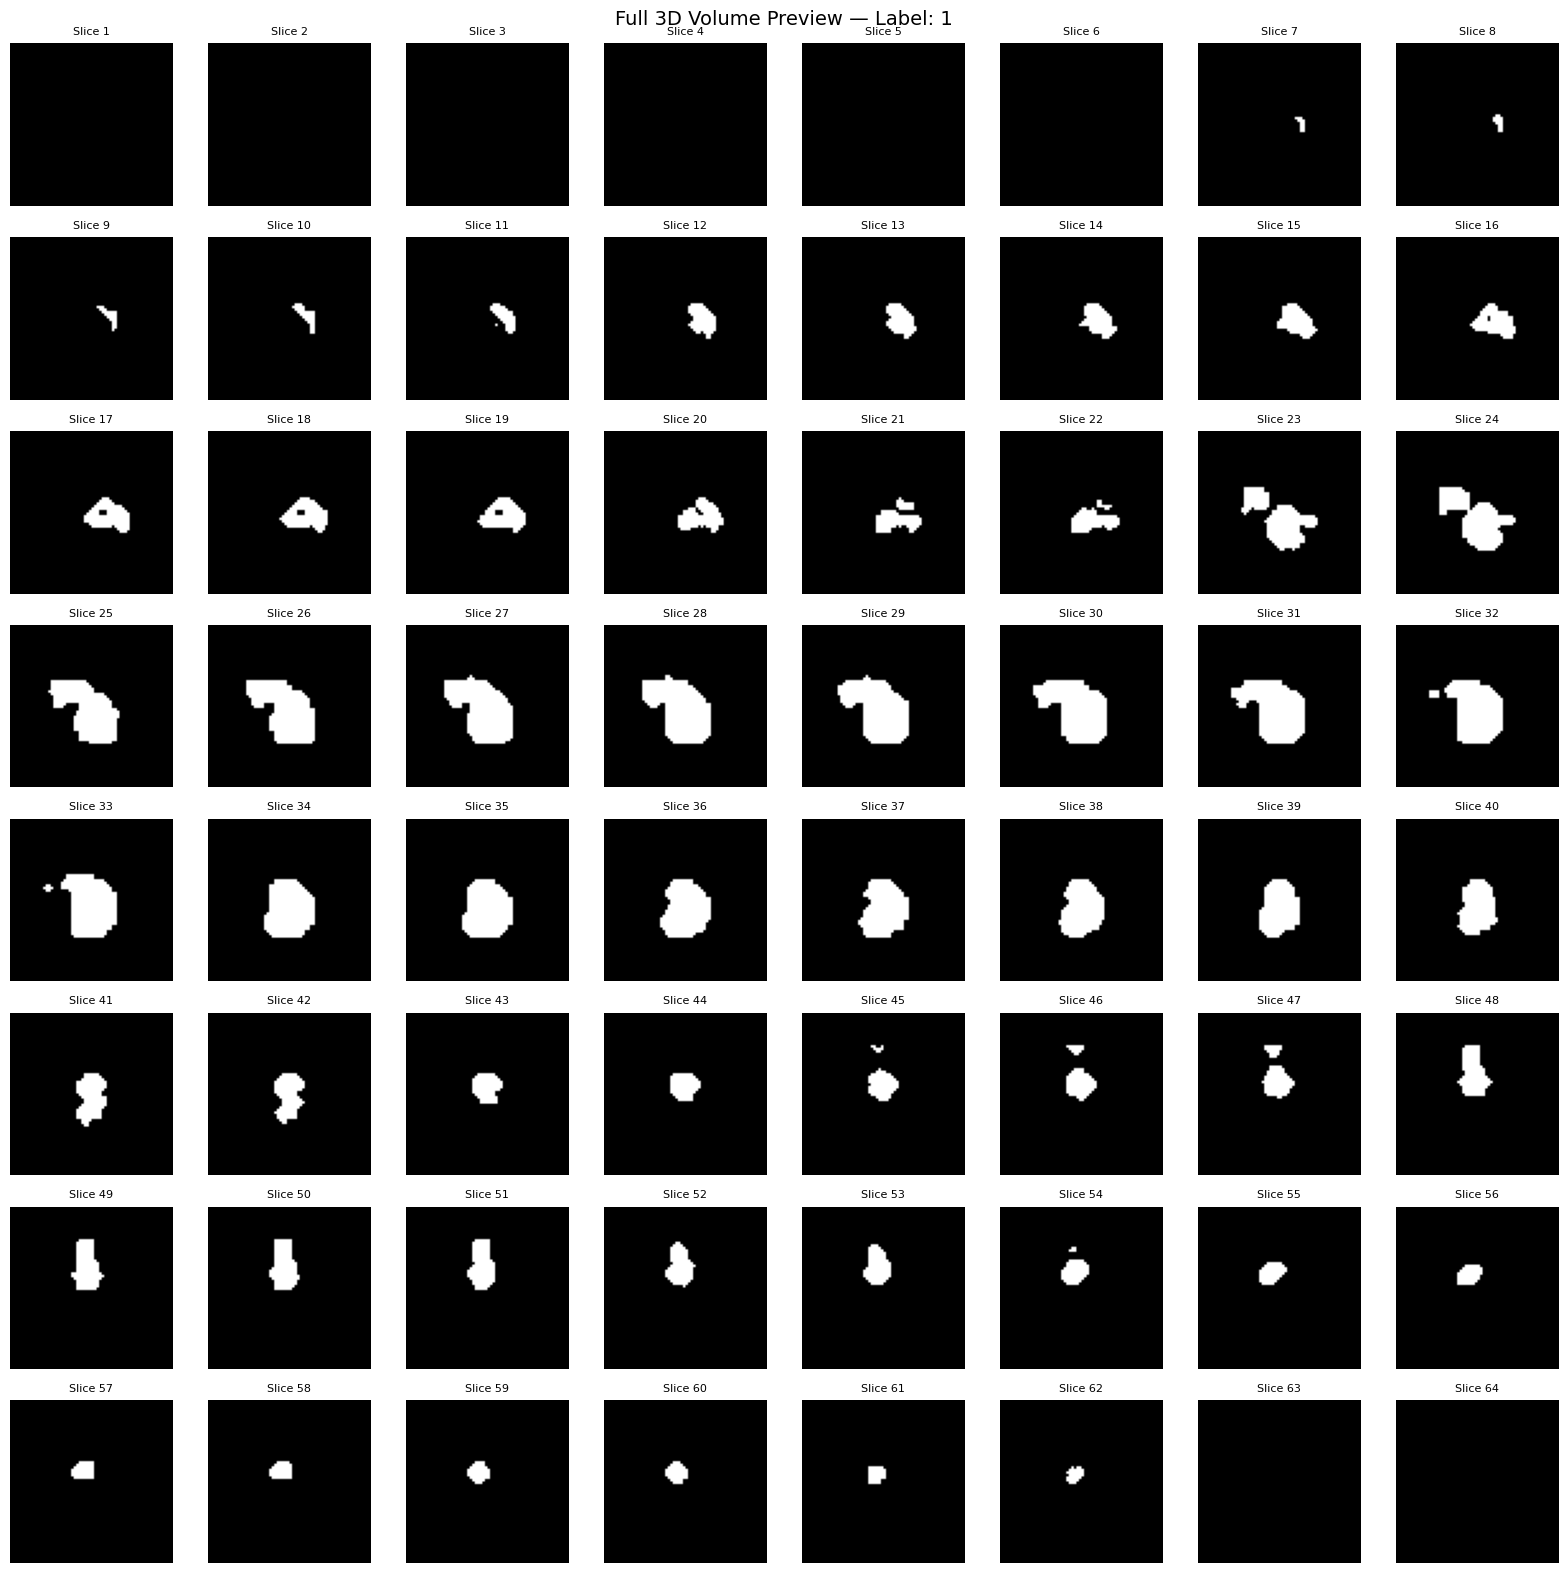

In [ ]:

import numpy as np
import numpy as np
import matplotlib.pyplot as plt

data_1 = np.load('/content/vesselmnist3d_64.npz')

# Extract datasets
X_train = data_1['train_images']
y_train = data_1['train_labels']

print("Train images:", X_train.shape)
print("Train labels:", y_train.shape)

# --- Visualization ---

def show_full_volume(images, labels, index=0):
    volume = images[index]
    label = labels[index][0] if labels.ndim > 1 else labels[index]

    print(f"Showing all 64 slices for sample {index} (Label: {label})")

    num_slices = volume.shape[-1]
    cols = 8
    rows = int(np.ceil(num_slices / cols))

    plt.figure(figsize=(16, rows * 2))
    for i in range(num_slices):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(volume[:, :, i], cmap='gray')
        plt.axis('off')
        plt.title(f"Slice {i+1}", fontsize=8)
    plt.suptitle(f"Full 3D Volume Preview — Label: {label}", fontsize=14)
    plt.tight_layout()
    plt.show()

# --- Show the first image (you can change the index to see others) ---
show_full_volume(X_train, y_train, index=0)

# Show 5 random samples
# show_slices(X_train, y_train, num_samples=5)

Unique labels: [0 1]
Number of unique labels: 2
Label 0: 1693 samples
Label 1: 215 samples


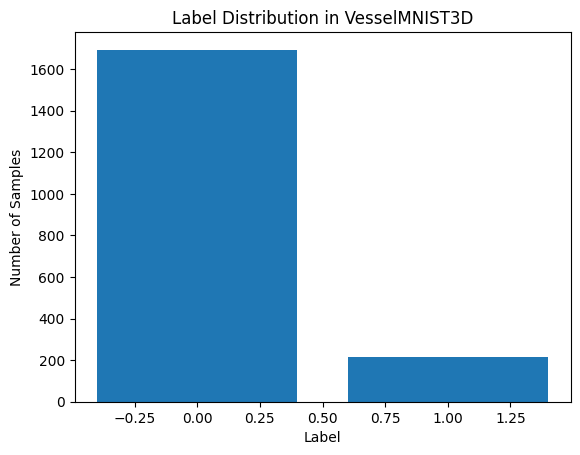

In [ ]:
import numpy as np

# Combine all labels across splits
all_labels = np.concatenate([y_train, y_val, y_test]).flatten()

# Unique labels
unique_labels = np.unique(all_labels)
print("Unique labels:", unique_labels)
print("Number of unique labels:", len(unique_labels))

# Count how many samples per label
labels, counts = np.unique(all_labels, return_counts=True)
for label, count in zip(labels, counts):
    print(f"Label {int(label)}: {count} samples")

# Visualize as a bar chart
import matplotlib.pyplot as plt

plt.bar(labels, counts)
plt.xlabel('Label')
plt.ylabel('Number of Samples')
plt.title('Label Distribution in VesselMNIST3D')
plt.show()

In [ ]:
from torch.utils.data import WeightedRandomSampler
# Bias mitigation
# We will address the bias by oversampling the minority class (malignant vessels)

class_counts = np.bincount(y_train_t.numpy())
class_weights = 1. / class_counts
sample_weights = class_weights[y_train_t.numpy()]
sampler = WeightedRandomSampler(sample_weights, len(sample_weights))

train_loader = DataLoader(train_dataset, batch_size=8, sampler=sampler)


AttributeError: 'numpy.ndarray' object has no attribute 'np'